# **import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

#**Data preprocessing**

In [ ]:
# Read data
data = pd.read_csv('/content/Restaurant reviews.csv')
data = data.drop(columns=["Restaurant", "Reviewer", "Metadata", "Time", "Pictures", "7514"])

# Display data before preprocessing
print("Data Before Preprocessing:")
print(data.head())

# Data cleaning
df = data.dropna().drop_duplicates()
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

# Text preprocessing
nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))
df['Review'] = [' '.join([ps.stem(word) for word in re.sub('[^a-zA-Z]', ' ', str(review)).lower().split() if word.lower() not in stop_words]) for review in df['Review']]

# Display data after preprocessing
print("\nData After Preprocessing:")
print(df.head())


Data Before Preprocessing:
                                              Review Rating
0  The ambience was good, food was quite good . h...      5
1  Ambience is too good for a pleasant evening. S...      5
2  A must try.. great food great ambience. Thnx f...      5
3  Soumen das and Arun was a great guy. Only beca...      5
4  Food is good.we ordered Kodi drumsticks and ba...      5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Data After Preprocessing:
                                              Review  Rating
0  ambienc good food quit good saturday lunch cos...     5.0
1  ambienc good pleasant even servic prompt food ...     5.0
2  must tri great food great ambienc thnx servic ...     5.0
3  soumen da arun great guy behavior sincereti go...     5.0
4  food good order kodi drumstick basket mutton b...     5.0


# **Data splitting**

In [ ]:
y = np.where(df["Rating"] <= 2, "Negative", np.where(df["Rating"] == 3, "Neutral", "Positive"))
X = df.drop(columns=["Rating"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


# **builing ML models**


1.   SVM Model
2.   Naive Bayes Model



In [ ]:
# SVM Model
svm_model = make_pipeline(TfidfVectorizer(max_features=5000), SVC())
svm_model.fit(X_train['Review'], y_train)
y_pred_svm = svm_model.predict(X_test['Review'])


In [ ]:
# Naive Bayes Model
nb_model = make_pipeline(TfidfVectorizer(max_features=500), MultinomialNB())
nb_model.fit(X_train['Review'], y_train)
y_pred_nb = nb_model.predict(X_test['Review'])

# **Model evaluation**

------------SVM Model-----------
Accuracy: 0.8314726209463051
Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.83      0.82       478
     Neutral       0.74      0.12      0.20       225
    Positive       0.84      0.97      0.90      1178

    accuracy                           0.83      1881
   macro avg       0.80      0.64      0.64      1881
weighted avg       0.82      0.83      0.80      1881



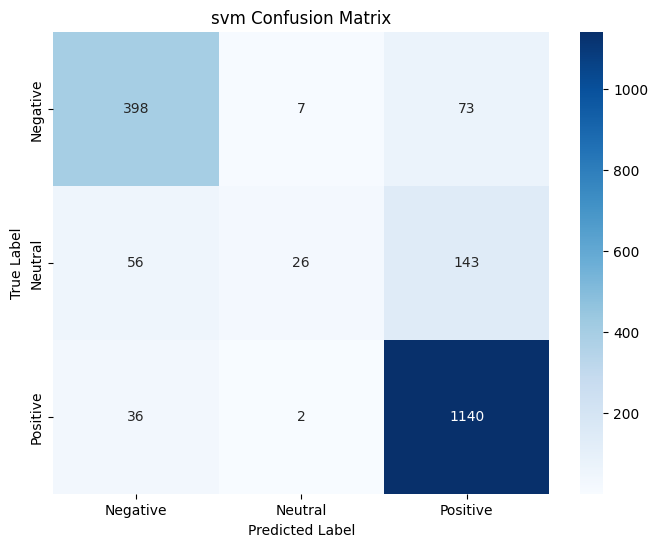

In [ ]:
# Evaluate SVM Model
print("------------SVM Model-----------")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("svm Confusion Matrix")
plt.show()

------------Naive Bayes Model-------------
Accuracy: 0.79585326953748
Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.70      0.76       478
     Neutral       0.69      0.04      0.08       225
    Positive       0.79      0.98      0.87      1178

    accuracy                           0.80      1881
   macro avg       0.77      0.57      0.57      1881
weighted avg       0.79      0.80      0.75      1881



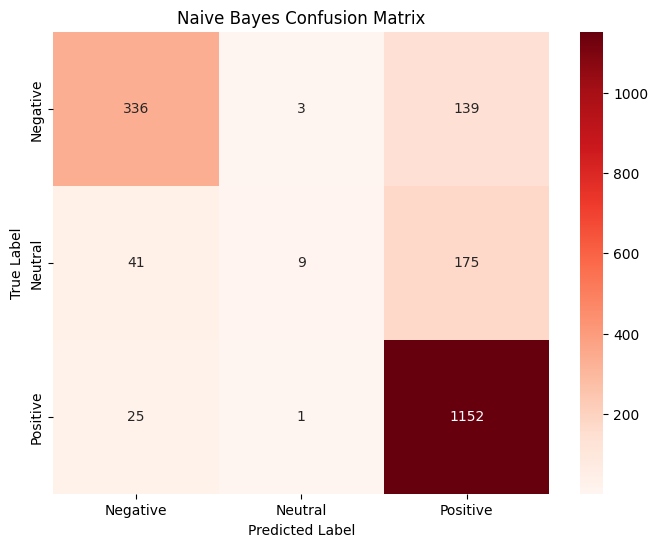

In [ ]:
# Evaluate Naive Bayes Model
print("------------Naive Bayes Model-------------")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)
# plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", xticklabels=["Negative", "Neutral", "Positive"], yticklabels=["Negative", "Neutral", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()
